 This Colab notebook utilizes the ProtT5 transformer model to classify protein sequences from the SignalP dataset as signal proteins or non-signal proteins. The workflow includes loading and preprocessing the data, generating embeddings using ProtT5, applying PCA for dimensionality reduction, and then performing classification using a Random Forest classifier. The model's performance is evaluated using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading train after embedding +PCA

In [ ]:
import pandas as pd
train_seq = pd.read_csv('/content/drive/MyDrive/train_embedding_pca.csv')
train_seq

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-6.212415,5.330431,-3.118716,-1.216276,1.106777,-0.242943,1.040821,-1.637920,-1.653871,1.397989,-2.214777,-0.074565,-2.928688,-3.474665,1.629252,2.789066,0.537623,0.437449,3.248126,0.094895
1,8.676520,5.966566,2.390554,-3.302744,0.454452,0.173834,-3.175569,-2.126507,7.101568,-0.913859,-1.153007,-2.698003,1.257092,-1.768048,1.674057,-1.749941,-1.881434,0.242575,-1.245462,1.187999
2,-4.085589,2.657291,3.683161,-1.363728,-0.115256,1.435782,0.998985,-2.203450,1.972816,-8.172208,3.638271,1.741510,5.842187,1.033636,-1.184375,2.337990,-0.306937,1.104753,0.287753,6.487707
3,0.709580,-6.543366,-1.842800,-2.189828,-5.331746,-1.472937,2.496861,1.117111,-0.099919,1.671030,1.162928,-3.030528,1.776765,-3.977128,0.701763,2.099315,5.913253,-2.246130,-0.045524,1.280804
4,1.115994,-8.641470,0.524740,-2.585347,-1.282193,3.748760,-0.125041,1.833538,-2.774344,2.769059,1.745862,-0.617172,-1.786337,-4.598591,-1.721885,3.217233,3.446489,0.695058,-1.170983,-0.297673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,-4.828081,2.611779,-2.825676,-1.617859,1.945208,-0.767039,0.122822,-4.676064,-1.432767,1.746683,-1.803132,4.570987,-2.398654,0.559833,2.183937,-1.626295,-1.211825,-0.135852,6.073715,0.051480
16602,0.473578,-0.602554,11.164914,0.253316,8.825190,4.882606,3.070355,0.098493,-2.541877,-7.819763,2.476568,-3.065998,1.632551,2.573734,-3.083939,0.032115,4.168105,-5.211138,1.241417,0.566537
16603,7.336265,9.887011,-7.331929,-1.448025,-10.914928,-7.571593,3.569095,8.570933,4.527179,-0.047887,-0.720866,2.789541,0.327724,-0.565471,-1.077368,1.323587,3.704174,5.305116,2.171761,-2.813233
16604,0.070553,-8.679641,0.465128,0.631074,-2.287060,-1.689969,2.130433,0.483426,-1.036823,0.125326,0.883553,2.599894,-5.195754,3.262794,2.184432,-3.162335,-2.836320,-3.336357,1.492470,-3.372732


Loading test after embedding +PCA

In [ ]:
import pandas as pd
test_seq = pd.read_csv('/content/drive/MyDrive/test_embedding_pca.csv')
test_seq

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.193338,-8.556536,-1.530562,-2.052081,-2.515001,3.551793,-2.394170,3.412644,-1.493162,-1.577308,2.155928,3.041301,-4.767307,-0.947909,1.900335,0.560582,4.226164,-1.310495,0.837327,-0.451053
1,-1.448492,0.196619,5.965590,4.398564,1.428066,-0.409115,-0.390983,2.051808,-1.837397,6.043552,-7.108071,0.748795,0.781872,1.131864,-0.014451,1.450606,4.149308,-2.830113,-3.635558,0.093805
2,-5.901646,2.453456,2.111922,0.846609,0.740065,-2.063273,1.404059,3.022074,0.593072,-1.737423,-2.203477,-1.139033,0.342680,-0.915557,-1.589859,-1.233452,2.188966,-1.176399,-0.235195,-0.274481
3,-4.876043,4.327706,-2.319302,1.655480,1.296564,-3.237431,2.181797,5.560192,4.931584,1.877016,6.925409,1.721349,2.362993,1.288994,1.165828,0.753942,1.886775,1.684335,3.321638,0.730089
4,12.955737,2.462870,1.471175,-8.073287,-1.174053,-5.090586,-4.149224,-1.438006,6.716650,3.019064,-0.962732,0.515855,2.325870,-6.787920,1.536743,0.555516,2.903597,2.319631,-1.992193,0.780600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,9.663173,-2.190229,-6.813550,8.167590,-1.220926,-2.082276,4.593051,-3.508079,-0.133670,-2.504652,0.505845,0.345753,4.887958,-0.961563,-3.790547,-2.483443,-0.553363,-0.391942,2.071660,-2.074474
4148,-5.283122,5.361380,-2.085303,-0.558943,2.537416,-2.152781,3.275819,2.442919,-0.396106,-0.801002,1.813914,3.131009,0.889738,-1.359560,0.364626,2.250517,0.784396,-0.190887,3.658045,0.049285
4149,-4.010725,4.573567,13.287553,9.876003,-7.768951,0.320303,-2.251279,-0.294341,3.288747,3.206272,1.336406,1.584648,-2.423026,2.265260,-2.508947,-0.772401,-0.891125,-1.696994,-0.157767,-1.670999
4150,-5.630876,2.637664,-4.639866,-0.983610,-3.884930,1.126553,-0.687542,0.680602,-1.252755,-0.000865,0.040383,2.667477,2.916996,0.597936,0.907749,-0.456821,-5.081936,5.455523,-1.198049,1.046560


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nadavbra/protein_bert/master/protein_benchmarks/signalP_binary.test.csv'

test = pd.read_csv(url, delimiter=',')
print(test.head())


   label                                                seq
0      0  MAVSVTPIRDTKWLTLEVCREFQRGTCSRPDTECKFAHPSKSCQVE...
1      0  MGSSFFGRPKMGGSSSSSPTSSSSSPAKRGKNKNGSDKPKQPQRGL...
2      0  MDISTRSKDPGSAERTAQKRKFPSPPHSSNGHSPQDTSTSPIKKKK...
3      0  MTATIIAAITITTIVIITPMEEITTMTIPMEEITTMTIPMEEITTM...
4      0  MAFKFKTFAAVGALIGSLALAGCGQDEKDPNHIKVGVIVGAEQQVA...


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nadavbra/protein_bert/master/protein_benchmarks/signalP_binary.train.csv'

train = pd.read_csv(url, delimiter=',')
print(train.head())


   label                                                seq
0      0  MLGMIRNSLFGSVETWPWQVLSTGGKEDVSYEERACEGGKFATVEV...
1      1  MQPAKNLLFSSLLFSSLLFSSAARAASEDGGRGPYVQADLAYAAER...
2      0  MDKGEGLRLAATLRQWTRLYGGCHLLLGAVVCSLLAACSSSPPGGV...
3      0  MKFIDEAKIEVAAGKGGNGATSFRREKFVPRGGPDGGDGGKGGSVW...
4      0  MVAGMLMPRDQLRAIYEVLFREGVMVAKKDRRPRSLHPHVPGVTNL...


In [ ]:
test['label'].value_counts()

label
0    3478
1     674
Name: count, dtype: int64

In [ ]:
train['label'].value_counts()

label
0    13908
1     2698
Name: count, dtype: int64

Plotting the Most Informative Principal Components (PCs) from PCA on the Training Data

<ipython-input-9-88646e0f987f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_df['Label'] = train['label']


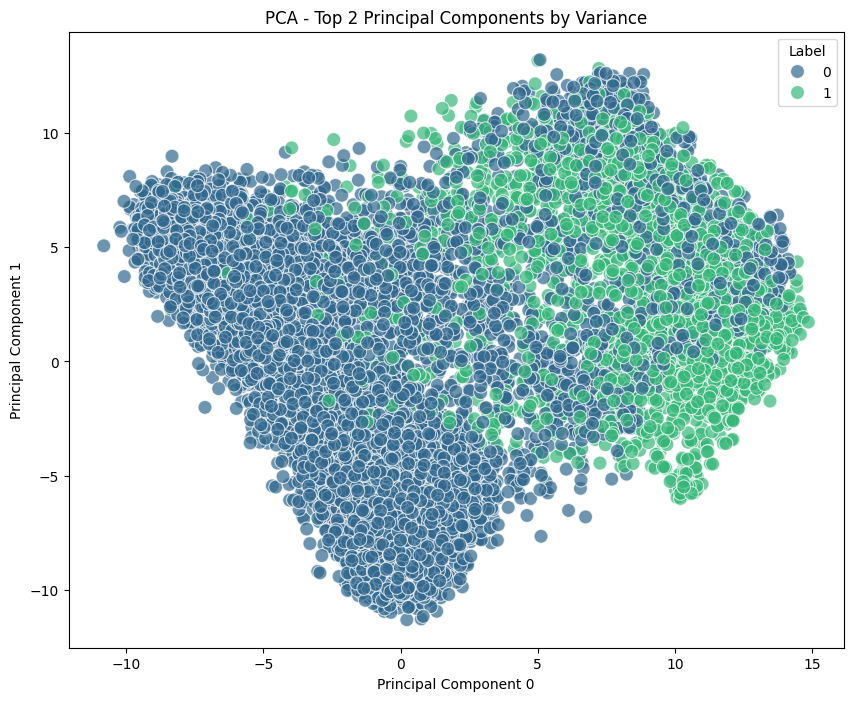

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the explained variance ratio for each component
explained_variance = train_seq.var(axis=0)

# Sort the components by explained variance in descending order and get the top 2
top_2_components = explained_variance.nlargest(2).index

# Extract the top 2 components
top_2_df = train_seq[top_2_components]

# Add the labels to the dataframe
top_2_df['Label'] = train['label']

# Plot the top 2 components with coloring by label
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_2_components[0], y=top_2_components[1], hue='Label', data=top_2_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA - Top 2 Principal Components by Variance')
plt.xlabel(f'Principal Component {top_2_components[0]}')
plt.ylabel(f'Principal Component {top_2_components[1]}')
plt.legend(title='Label')
plt.show()


Plotting the Most Informative Principal Components (PCs) from PCA on the Tresting Data

<ipython-input-10-a5b54cac92e4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_df['Label'] = test['label']


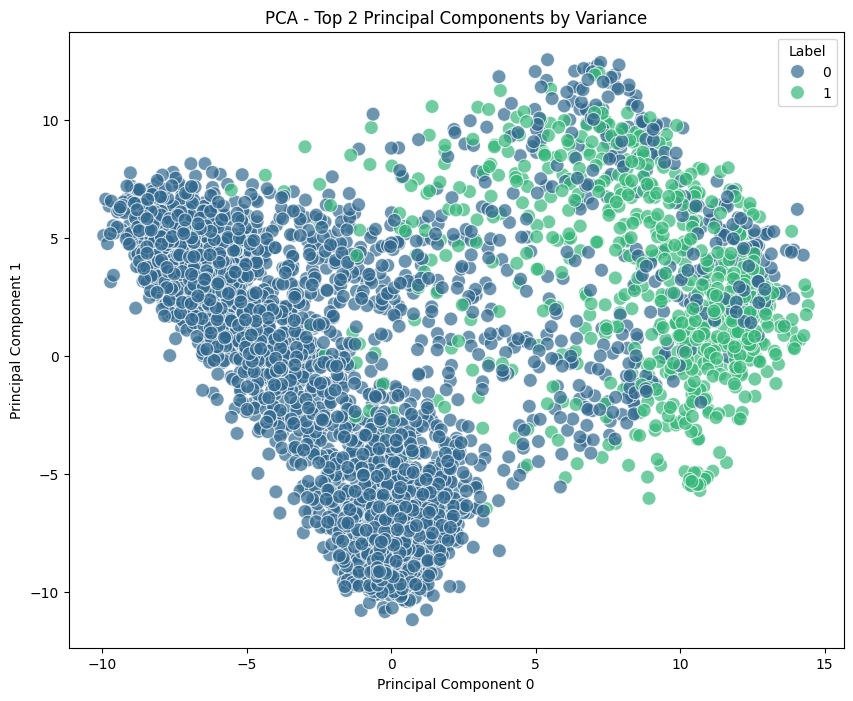

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the PCA components dataframe `pca_df` and the labels dataframe `labels_df`

# Compute the explained variance ratio for each component
explained_variance = test_seq.var(axis=0)

# Sort the components by explained variance in descending order and get the top 2
top_2_components = explained_variance.nlargest(2).index

# Extract the top 2 components
top_2_df = test_seq[top_2_components]

# Add the labels to the dataframe
top_2_df['Label'] = test['label']

# Plot the top 2 components with coloring by label
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_2_components[0], y=top_2_components[1], hue='Label', data=top_2_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA - Top 2 Principal Components by Variance')
plt.xlabel(f'Principal Component {top_2_components[0]}')
plt.ylabel(f'Principal Component {top_2_components[1]}')
plt.legend(title='Label')
plt.show()


Random forest

In [ ]:
X_train=train_seq
y_train=train['label']
X_test=test_seq
y_test=test['label']

Confusion Matrix:
[[3455   23]
 [  80  594]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3478
           1       0.96      0.88      0.92       674

    accuracy                           0.98      4152
   macro avg       0.97      0.94      0.95      4152
weighted avg       0.97      0.98      0.97      4152


Accuracy: 0.98

ROC AUC: 0.99


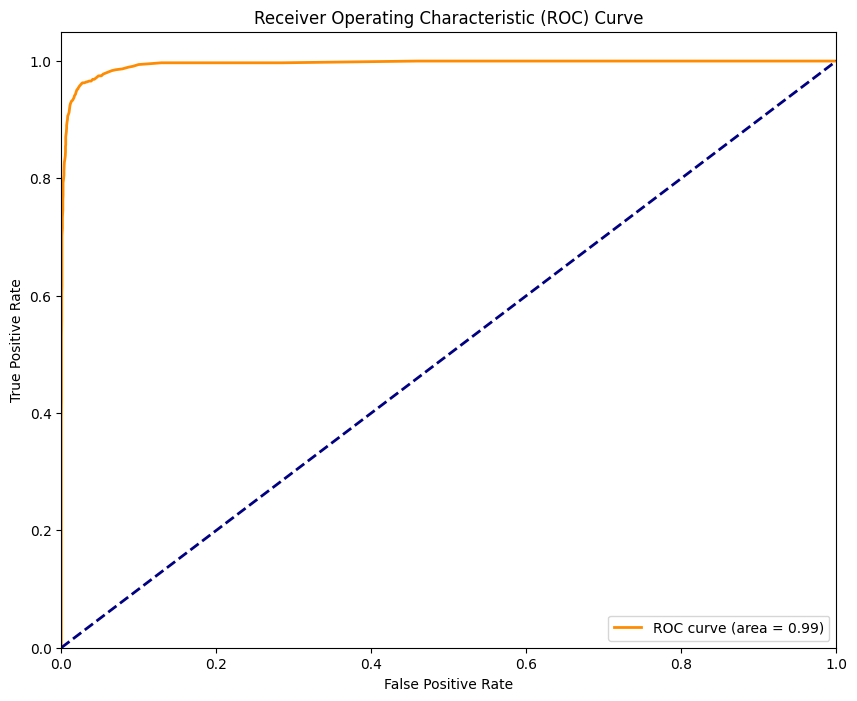

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming your data is already loaded into the following variables
# X_train, X_test, y_train, y_test

# Initialize the RandomForestClassifier with class weights
clf = RandomForestClassifier(class_weight='balanced')

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Achieved an accuracy of 98%, demonstrating clear separation of the two categories.